# Исследование данных сервиса аренды самокатов GoFast

В нашем распоряжении данные сервиса аренды самокатов GoFast. Данные содержат сведения о некоторых пользователях из нескольких городов, а также об их поездках. Все пользователи разделены на две категории - пользователи с подпиской и без подписки. Изначально данные разделены на несколько таблиц 

Цель проекта - проанализировать данные, проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти:

***пользователи с подпиской тратят больше времени на поездки***

***расстояние, которое проезжают пользователи с подпиской непривыкшая оптимальное расстояние с точки зрения износа самоката***

***помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки***

Для этого нам предстоит изучить имеющиеся исходные данные, проверить таблицу на наличие пропусков, соответствия типа данных и выявить дубли. Затем необходимо проверить данные на наличие аномальных и редких значений, визуализировать и изучить информацию по нужным нам категориям. Затем объединить все таблицы в один датафрейм, а затем разделить его на отдельные датафреймы для каждой категории пользователей. Затем создадим агрегированную таблицу, для подсчета выручки, необходимой для проверки одной из гипотез

На этапе проверки гипотез с помощью необходимых методов проверим принимаются нулевые гипотезы или нет. Полученные результаты отразим в выводах.


In [1]:
#Импорт необходимых бибилиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

# Шаг 1. Загрузка данных

**Пользователи**

In [2]:
#Чтение файла с данными пользователей 
data_user = pd.read_csv('/datasets/users_go.csv')

#Вывод первых 20 строк
data_user.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
#Вывод общей информации о датафрейме
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме не встречаются пропуски по столбцам, тип данных соответствуют содержанию столбца

**Поездки**

In [4]:
#Чтение файла с данными о поездках
data_rides = pd.read_csv('/datasets/rides_go.csv')

#Вывод первых 20 строк
data_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
#Вывод общей информации о датафрейме
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датафрейме не встречаются пропуски по столбцам, тип столбца 'date' object, необходимо заменить на datetime, т.к. в этом столбце указана дата совершения поездки. Так же можно округлить значения в столбцах с расстоянием и продолжительностью поездки

**Подписки**

In [6]:
#Чтение файла с данными подписок
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

#Вывод первых 20 строк
data_subscriptions.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
#Вывод общей информации о датафрейме
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм состоит всего из двух строк. Все столбцы заполнены, тип данных соответствеут содержанию столбца

# Шаг 2. Предобработка данных

**Замена типа данных и добавление необходимого столбца**

In [8]:
#Замена типа данных в столбце 'data'
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [9]:
#Проверка изменения типа данных в столбце 'date'
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Заменили тип данных в столбце 'date' на формат datetime

In [10]:
#Создание нового столбца с номером месяца
data_rides['month'] = data_rides['date'].dt.month

#Округление продолжительности поездки
data_rides['duration'] = data_rides['duration'].round(2)
#Округление расстояния поездки
data_rides['distance'] = data_rides['distance'].round(2)

#Вывод датафрейма после добавление нового столбца
data_rides.head(20)

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8
5,1,2770.89,16.65,2021-10-09,10
6,1,3039.02,14.93,2021-10-19,10
7,1,2842.12,23.12,2021-11-06,11
8,1,3412.69,15.24,2021-11-14,11
9,1,748.69,15.04,2021-11-22,11


In [11]:
#Нахождение самой ранней даты в датафрейме
data_rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [12]:
#Нахождение самой поздней даты в датафрейме
data_rides['date'].max()

Timestamp('2021-12-30 00:00:00')

Округлили значения в столбцах с продолжительностью поездки и расстоянием. Также добавили столбец с номером месяца и установили, что данные в датафрейме за период - 2021 год

**Проверка наличия пропусков и дублей в датафреймах**

In [13]:
#Проверка наличия пропусков в двтафрейме
data_user.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
#Проверка наличия пропусков в двтафрейме
data_rides.isna().sum().sort_values(ascending=False)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
#Проверка наличия пропусков в двтафрейме
data_subscriptions.isna().sum().sort_values(ascending=False)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [16]:
#Проверка наличия пропусков в двтафрейме
data_user.duplicated().sum()

31

In [17]:
#Проверка наличия пропусков в двтафрейме
data_rides.duplicated().sum()

0

In [18]:
#Проверка наличия пропусков в двтафрейме
data_subscriptions.duplicated().sum()

0

В датафрейме 'data_user' имеется 31 дублирующая строка. Так как в датафрейме имеется столбце 'user_id', т.е. у каждого пользователя свой идентификационный номер, то дублирование могло произойти из-за технической ошибки. Учитывая небольшое количество дублей, можно их удалить. В остальных дамафреймах дубликаты отсутствуют

In [19]:
#Замена дубликатов в датафрейме 'data_user'
data_user = data_user.drop_duplicates()

#Подсчет дубликатов после замены
data_user.duplicated().sum()

0

In [20]:
#Сброс индекса после удаления дублирующихся значений
data_user = data_user.reset_index (drop=True)

In [21]:
#Вывод общей информации о датафрейме
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [22]:
#Расчет доли удаленных значений
deleted_values = (1565 -1534 )/1565 * 100
deleted_values

1.9808306709265175

Доля удаленных значений составила 1,98%

**Вывод по предобработке** В имеющихся датафреймах отсутствовали пропущенные значения. Вместе с тем в датафрейме с данными пользователей имелись дублирующие значения - 31 строка. После удаления дублирующих значений, изначальная таблица сократилась на 1,98%. Также в датафрейме о поездках в столбце с датой поездки был заменен тип данных с object на datetime, а также добавлен ещё один столбце с новыми параметрами, необходимыми для дальнейшего анализа. Был установлен исследуемый период и округлены значения в столбцах с продолжительностью и расстоянием поездки

# Шаг 3. Исследовательский анализ данных

**Частота встречаемости города**

In [23]:
#Подсчет уникальных значений в столбце 'city'
data_user_city_counts = data_user['city'].value_counts()

data_user_city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [24]:
# Сортировка столбца 'city' 
data_user_city_sorted = data_user_city_counts.sort_values()

data_user_city_sorted

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

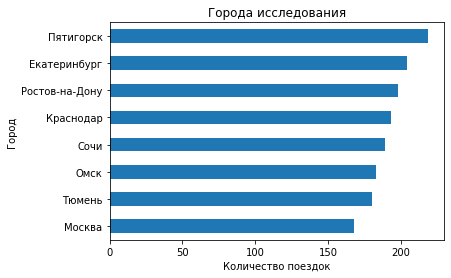

In [25]:
#Создание графика
plt.title('Города исследования')
plt.xlabel('Количество поездок')
plt.ylabel('Город')
data_user_city_sorted.plot.barh()
plt.show()


**Вывод**

В датафрейме имеются записи о 8 городах. Чаще всего встречается Пятигорск (219 раз), заметно реже всех встречается Москва (163 раза). Частота встречаемости остальных городов расположена в промежутке 180-204 раза

**Соотношение пользователей с подпиской и без подписки**

In [26]:
#Подсчет уникальных значений в столбце 'subscription_type'  
data_user['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

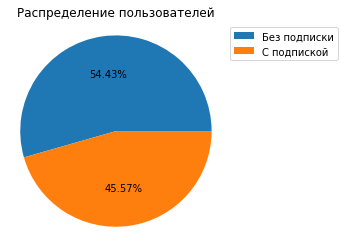

In [27]:
#Постройка круговой диаграммы

count = [835, 699]
subscription_type = ['Без подписки', 'С подпиской']

plt.title('Распределение пользователей')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = subscription_type )
plt.show()

**Вывод**

Количество пользователей без подписки на 8.86% превышает количество пользователей с подпиской

**Возраст пользователей**

In [28]:
#Вывод числовых значений столбца 'age'
display(data_user['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [29]:
#Расчет значения моды столбце 'age'  

moda_age = data_user['age'].mode()[0]
moda_age

25

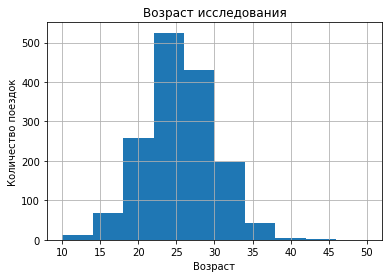

In [30]:
#Постройга гистограммы
data_user['age'].hist(range=(10, 50))

plt.title('Возраст исcледования')
plt.xlabel('Возраст')
plt.ylabel('Количество поездок')
plt.show()

**Вывод**

Средний и медианный возраст пользователей практически одинаковый - 24,9 и 25 лет соответственно. Это подтверждается модой, которая равна медианному значению, т.е. чаще остальных сервисом аренды самокатов пользуются люди в возрасте 25 лет. Основной возраст пользователей лежит в диапазоне 22-28 лет, это подтверждается и значениями 1 и 3 квартиля и гисограммой, по которой видно, что после отметки в 22 года идет резкий рост числа пользователей, а после 28 лет наблюдается резкий спад пользователей, после 33 лет количество пользователей уменьшается ещё больше, а после 37 практически равно 0. Максимальный возраст пользователей сервисом 43 года, минимальный 12 лет 



**Расстояние, которое пользователь преодолел за одну поездку**

In [31]:
#Вывод числовых значений столбца 'distance'
display(data_rides['distance'].describe())


count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

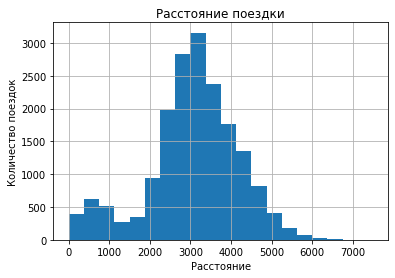

In [32]:
#Постройга гистограммы
data_rides['distance'].hist(bins = 20, range=(0, 7500))

plt.title('Расстояние поездки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

**Вывод**

Среднее и медианное значение расстояния поездки примерно одинаковые - 3071 и 3134 м. соответственно. Минимальное расстояние составляет 0,85 м, максимальное 7211 м. По гистограмме можно заметить, что количество поездок на расстояние до 1000 м., больше количества поездок на расстояние от 1000 м до 2000 м. Начиная с отметки 3500 м количество поездок постепенно уменьшается, отметки в 6000 м. количество поездок минимально и стремиться к 0. На диаграмме видны два пиковых значения - 500 м и 3500. Пиковое значение на расстоянии в 500 метров, возможно объясняется первой поездкой, т.е. неопытные пользователи, впервые пробующие проехаться на самокате, как правило не проезжают большое расстояние. Пиковое значение на 3500 м, возможно объясняется тем, что опытные пользователи часто используют самокат для того, чтобы добраться до места учебы или работы, т.е. как правило проезжают одинаковое расстояние каждый день

**Продолжительность поездок**

In [33]:
#Вывод числовых значений столбца 'duration'
display(data_rides['duration'].describe())

count    18068.000000
mean        17.805017
std          6.091071
min          0.500000
25%         13.600000
50%         17.680000
75%         21.722500
max         40.820000
Name: duration, dtype: float64

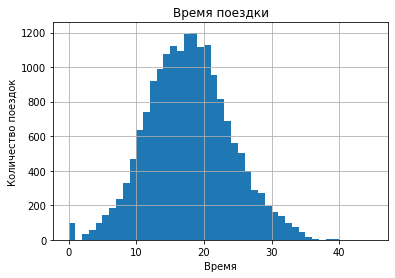

In [34]:
#Постройга гистограммы
data_rides['duration'].hist(bins = 45, range=(0, 45))

plt.title('Время поездки')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.show()

**Вывод**

Средние и медианное значение продолжительности поездок примерно одинаковы - 17.8 и 17.6 мин. соответственно. Минимальная поездка 0.5 мин., в районе этой же отметки наблюдается небольшой всплеск поездок, это можно соотнести с минимальным расстоянием поездки в 0.85 м, это можно объяснить пробной поездкой. Максимальное время поездки составляет 40.8 мин. По гистограмме видно, что чаще всего время поездки составляет от 13 до 17 минут. Резкое увеличение продолжительности поездок наблюдается с 9 минуты, а резкий спад с последующим уменьшением времени после 22 минуты. Это также можно соотнести со средним расстоянием поездки в 3071 м., т.е. можно предположить, что это пользователи которые часто проезжают одинаковое расстояние, например, до учебы или работы. Количество поездок, превышающее 35 минут, практически равно 0

# Шаг 4. Объединение данных

In [35]:
#Объединение датафреймов 'data_user' и 'data_rides' по столбцу 'user_id'
data_general = data_user.merge(data_rides, on='user_id')


In [36]:
#Объединение датафреймов 'data_general' и 'data_subscriptions' по столбцу 'subscription_type'
data_general = data_general.merge(data_subscriptions, on='subscription_type')

#Вывод нового датафрейма 
data_general

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,11,8,50,0


Создали единый датафрейм из трех изначальных, сначала объединив таблицы с информацией о пользователях и поездках, по идентификационному номеру пользователя. Затем полученный датафрейм объединили с датафреймом о подписках по их наличию. Таблица содержит 18068 строк, столько же содержала самая большая из изначальных таблиц - таблица с поездками.

In [37]:
#Создание отдельного датафрейма с данными о пользователях с подпиской
data_general_ultra =  data_general[data_general['subscription_type'] == 'ultra']

#Создание отдельного датафрейма с данными о пользователях без подписки
data_general_free =  data_general[data_general['subscription_type'] == 'free']

In [38]:
#Вывод датафрейма 'data_general_ultra'
data_general_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.67,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.89,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.39,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.84,2021-10-17,10,6,0,199


In [39]:
#Вывод датафрейма 'data_general_free'
data_general_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,11,8,50,0


Создали из общего датафрейма отдельные датафреймы по пользователям с подпиской и без неё, т.е. создали две выборки из генеральной совокупности

**Расстояние поездок по категориям**

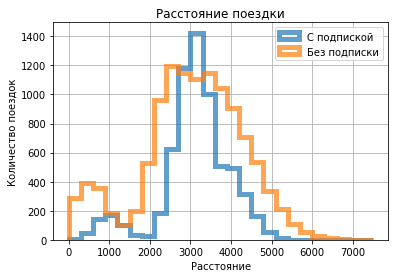

In [40]:
#Создание гистограмм для растояния
ax = data_general_ultra['distance'].plot(
    kind='hist',
    histtype='step',
    range=(0, 7500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    legend=True
)
data_general_free['distance'].plot(
    kind='hist',
    histtype='step',
    range=(0, 7500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='Без подписки',
    ax=ax,
    grid=True,
    legend=True,
)

plt.title('Расстояние поездки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

In [41]:
#Вывод числовых значений столбца 'distance' для пользователей с подпиской
display(data_general_ultra['distance'].describe())

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [42]:
#Вывод числовых значений столбца 'distance' для пользователей без подпиской
display(data_general_free['distance'].describe())

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

**Вывод**

Среднее и медианное значение расстояния, которое проезжают пользователи сервиса практически одинокого, вне зависимости от наличия или отсутствия подписки. По гистограмме пользователей с подпиской можно заметить, что они чаще чем пользователи без подписки проезжают расстояние 3000-3500 м., а пользователи без подписки намного чаще проезжают расстояние менее 1000 м., после чего у них наблюдается схожая общая динамика с пользователями с подпиской.


**Время поездок по категориям**

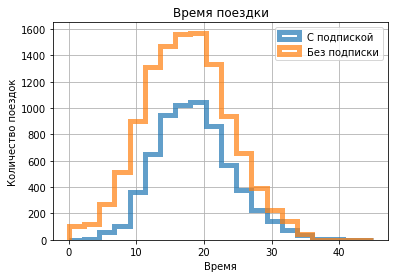

In [43]:
#Создание гистограмм для времени поезок
ax = data_general_ultra['duration'].plot(
    kind='hist',
    histtype='step',
    range=(0, 45),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    legend=True
)
data_general_free['duration'].plot(
    kind='hist',
    histtype='step',
    range=(0, 45),
    bins=20,
    linewidth=5,
    alpha=0.7,
    label='Без подписки',
    ax=ax,
    grid=True,
    legend=True,
)

plt.title('Время поездки')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.show()

In [44]:
#Вывод числовых значений столбца 'duration' для пользователей с подпиской
display(data_general_ultra['duration'].describe())

count    6500.000000
mean       18.542017
std         5.572065
min         3.760000
25%        14.527500
50%        18.180000
75%        21.880000
max        40.820000
Name: duration, dtype: float64

In [45]:
#Вывод числовых значений столбца 'duration' для пользователей без подпиской
display(data_general_free['duration'].describe())

count    11568.000000
mean        17.390900
std          6.326821
min          0.500000
25%         12.960000
50%         17.330000
75%         21.592500
max         34.950000
Name: duration, dtype: float64

**Вывод**

Среднее и медианное значение времени поездок по обеим категориям близки друг к другу, но можно отметить, что данные показатели у пользователей с подпиской почти на минуту выше, чем у пользователей без подписки, несмотря на то, что пользователей без подписки больше. По гистограмме можно заметить, что у пользователей без подписки, несмотря на большее количество поездок, больше поездок на более короткие промежутки времени. Это также соотносится с короткими расстояниями поездок, т.е. пользователи с подпиской используют самокаты для более долгих и продолжительных поездок, это может быть связанно с опытом и конкретной целью, а пользователи без подписок ввиду малой опытности пользуются сервисом более короткое время

# Шаг 5. Подсчёт выручки

**Создание датафрейма с агрегированными данными о поездках** 

Для подсчета помесячной выручки необходимо создать агрегированный датафрейм с данными о поездках для каждого пользователя по каждому месяцу. Для этого нужно добавить столбцы с типом подписки, стоимости минуты поездки по подписке, стоимость начала поездки и стоимость ежемесячного платежа. Данные в указанные столбцы, можно взять по минимальному или максимальному значению, т.к. данные в каждой категории одинаковы

In [46]:
#Округление продолжительности поездки до целого числа
data_general['duration'] = np.ceil(data_general['duration'])

In [47]:
#Группировка данных по идентификационному номеру пользователя и месяцу поездки
#Добавление количества поездок,суммарного расстояния и суммарноого времени,подписки и ценовых показателей для каждого пользователя за месяц
data_general_agg = data_general.groupby(['user_id', 'month']).agg({'distance': ['count','sum'], 'duration': 'sum', 
            'subscription_type': 'min','minute_price': 'min','start_ride_price': 'min', 'subscription_fee': 'min'})

#Переименование столбцов
data_general_agg.columns = ['count','distance_sum', 'duration_sum', 'subscription_type',
                            'minute_price', 'start_ride_price','subscription_fee']
#Вывод датафрейма
data_general_agg

count  distance_sum  duration_sum subscription_type  \
user_id month                                                        
1       1          2       7027.51          42.0             ultra   
        4          1        754.16           7.0             ultra   
        8          2       6723.47          46.0             ultra   
        10         2       5809.91          32.0             ultra   
        11         3       7003.50          56.0             ultra   
...              ...           ...           ...               ...   
1534    6          2       3409.47          26.0              free   
        8          2       7622.45          48.0              free   
        9          1       4928.17          23.0              free   
        11         4      13350.02          78.0              free   
        12         1       2371.71          16.0              free   

               minute_price  start_ride_price  subscription_fee  
user_id month                                                    
1       1                 6                 0               199  
        4                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        11                6                 0               199  
...                     ...               ...               ...  
1534    6                 8                50                 0  
        8                 8                50                 0  
        9                 8                50                 0  
        11                8                50                 0  
        12                8                50                 0  

[11331 rows x 7 columns]

**Подсчет помесячной выручки**

In [48]:



data_general_agg['revenue'] = (data_general_agg['start_ride_price'] * data_general_agg['count'])+(data_general_agg['minute_price']*data_general_agg['duration_sum']) + data_general_agg['subscription_fee']

#Вывод нового датафрейма
data_general_agg

count  distance_sum  duration_sum subscription_type  \
user_id month                                                        
1       1          2       7027.51          42.0             ultra   
        4          1        754.16           7.0             ultra   
        8          2       6723.47          46.0             ultra   
        10         2       5809.91          32.0             ultra   
        11         3       7003.50          56.0             ultra   
...              ...           ...           ...               ...   
1534    6          2       3409.47          26.0              free   
        8          2       7622.45          48.0              free   
        9          1       4928.17          23.0              free   
        11         4      13350.02          78.0              free   
        12         1       2371.71          16.0              free   

               minute_price  start_ride_price  subscription_fee  revenue  
user_id month                                                             
1       1                 6                 0               199    451.0  
        4                 6                 0               199    241.0  
        8                 6                 0               199    475.0  
        10                6                 0               199    391.0  
        11                6                 0               199    535.0  
...                     ...               ...               ...      ...  
1534    6                 8                50                 0    308.0  
        8                 8                50                 0    484.0  
        9                 8                50                 0    234.0  
        11                8                50                 0    824.0  
        12                8                50                 0    178.0  

[11331 rows x 8 columns]

# Шаг 6. Проверка гипотез

**Тратят ли пользователи с подпиской больше времени на поездки?**

Необходимо проверить гипотезу тратят ли пользователи с подпиской больше времени на поездки, т.е. мы имеем две независимые совокупности, таким оброзом мы можем применить метод сравнения равенства средних двух геннеральных совокупностей - scipy.stats.ttest_ind(). Нулевая гипотеза - средние значения времени поездок из двух групп равны., Альтернативная гипотеза - среднее значение времени поездок пользователей с подпиской больше, чем среднее значение времени поездок пользователей без подписки. В качестве alternative нужно указать 'greater', то есть «больше».

In [49]:
#Проверяем гипотезу

alpha = 0.05 

results = st.ttest_ind(data_general_ultra['duration'], data_general_free['duration'], alternative='greater')


print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.274138957151199e-34
Отвергаем нулевую гипотезу


**Вывод**

После проверки гипотезы с помощью метода scipy.stats.ttest_ind() мы получили результат - Отвергаем нулевую гипотезу (p-значение: 1.274138957151199e-34), в пользу альтернативной. Таким образом среднее время поездок пользователей с подпиской больше среднего времени поездок без подписки и они могут быть "выгоднее" для компании

**Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров**

Необходимо проверить гипотезу не превышает ли расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 м., т.к. данное растояние считается оптимальным с точки зрения износа самоката. Проверим эту гипотезу с помощью метода scipy.stats.ttest_1samp() для левосторонней гипотезы. Среднее растояние одной поездки пользователем с подпиской не привышает 3130 м., примем это за нулевую гипотезу (H0), тогда альтернативная гипотеза (H1) - среднее растояние одной поездки пользователем с подпиской привышает 3130 м.

In [50]:
#Проверяем гипотезу
distance_ultra = data_general_ultra['distance']

optimal_distance_ultra = 3130

alpha = 0.05 

results = st.ttest_1samp(
    distance_ultra, 
    optimal_distance_ultra,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


**Вывод**
После проверки гипотезы с помощью метода scipy.stats.ttest_1samp() мы получили результат - Не отвергаем нулевую гипотезу (p-значение: 0.9), в пользу альтернативной. Таким образом среднее расстояние одной поездки пользователя с подпиской не превышает оптимального расстояния для износа самоката, т.е. пользователи с подпиской "выгоднее" с точки зрения амортизации самоката.

**Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки** 

Необходимо проверить гипотезу, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, т.е. мы имеем две независимые совокупности, таким оброзом мы можем применить метод сравнения равенства средних двух геннеральных совокупностей - scipy.stats.ttest_ind(). Нулевая гипотеза - средние значения помесячной выручки из двух групп равны., Альтернативная гипотеза - среднее значение помесячной выручка пользователей с подпиской больше, чем среднее значение помесячной выручки пользователей без подписки. В качестве alternative нужно указать 'greater', то есть «больше».

In [51]:
#Создание датафрейма с агрегированными данными для пользователей с подпиской
data_general_agg_ultra =  data_general_agg[data_general_agg['subscription_type'] == 'ultra']

#Создание датафрейма с агрегированными данными для пользователей без подпиской
data_general_agg_free =  data_general_agg[data_general_agg['subscription_type'] == 'free']

#Проверяем гипотезу

alpha = 0.05 

results = st.ttest_ind(data_general_agg_ultra['revenue'], data_general_agg_free['revenue'], alternative='greater')


print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-value: 1.8164914860049708e-31
Отвергаем нулевую гипотезу


**Вывод**

После проверки гипотезы с помощью метода scipy.stats.ttest_ind() мы получили результат - Отвергаем нулевую гипотезу (p-значение: 1.8164914860049708e-31), в пользу альтернативной. Таким образом помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки

**Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?**

Данная ситуация является примером гипотезы о равенстве средних для зависимых (парных) выборок, т.е. необходимо провести анализ одной генеральной совокупности, с которой произошли некоторые изменения, для этого нужно проверить равны ли средние совокупности до и после этих изменений. Для этого в Python, применим метод scipy.stats.ttest_rel()

# Общий вывод

Нами проведен анализ данных сервиса аренды самокатов GoFast. Изначально данные были разделены на несколько отдельных таблиц - информация о пользователях, информация о поездках и информация о подписках. На этапе предобработки данных было проанализировано содержание предоставленных таблицы, в таблицах не было выявлено пропусков, была произведена замена типа данных в столбце содержащим дату поездки, а также добавлен столбец с номером месяца, который необходим для последующего анализа. Были округлены до двух знаком после запятой значения в столбцах с расстоянием и продолжительностью поездки. Выявлены дубликат строк в таблице содержащей данные пользователей. дубликаты были удалены, их доля составила 1,98%. 

С помощью метода describe() и гистограмм проанализированы следующие данные: 

Частота встречаемости городов - Сервисом пользуются в 8 городах. Чаще всего встречается Пятигорск (219 раз), заметно реже всех встречается Москва (163 раза). Частота встречаемости остальных городов расположена в промежутке 180-204 раза; 

Соотношении пользователей с подпиской и без подписки - Количество пользователей самокатами без подписки на 8.86% превышает количество пользователей с подпиской;

Возраст пользователей - Чаще остальных сервисом аренды самокатов пользуются люди в возрасте 25 лет. Основной возраст пользователей лежит в диапазоне 22-28 лет, после 28 лет наблюдается резкий спад пользователей, после 33 лет количество пользователей уменьшается ещё больше, а после 37 практически равно 0. Максимальный возраст пользователей сервисом 43 года, минимальный 12 лет;

Расстояние, которое пользователь преодолел за одну поездку - Среднее расстояние поездки - 3070. Минимальное расстояние составляет 0,85 м, максимальное 7211 м.  На диаграммах были выявлены два пиковых значения - 500 м и 3500;

Продолжительность поездок - Среднее значение у пользователей с подпиской почти на минуту выше, чем у пользователей без подписки - 18,5 мин., несмотря на то, что пользователей без подписки больше. 

По гистограммам можно заметить, что у пользователей без подписки, больше поездок на более короткие промежутки времени. Это также соотносится с короткими расстояниями поездок, т.к. многие пользователи, не имеющие подписку, являются новичками или имеющими небольшой опыт в использовании самокатов. Продолжительное время использование самокатов и пиковое значение расстояния в 3500 м. у пользователей с подпиской можно объяснить тем, что опитые пользователи при использовании самокатов уже имеют постоянные маршруты для поездок, например, на учебу или работу и совершают их с постоянной периодичностью. 

Затем мы создали таблицу с агрегированными данными о поездках и подсчитали помесячную выручку.

На основании имеющихся данных проверили гипотезы о том, что пользователи с подпиской тратят больше времени на поездки (Гипотеза 1); среднее расстояние, которое проезжают пользователи с подпиской не превышает оптимальное расстояние с точки зрения износа самоката (Гипотеза 2); помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки (Гипотеза 3). После проверки гипотез, получили результат не отвергающий значение этих гипотез. 

Таким образом, после проведения исследования можно сделать вывод, что пользователи с подпиской более "выгодные" по всем трем гипотезам. Они дольше пользуются услугой за поездку, проезжают расстояние меньше оптимального расстояния износа самоката, т.е. они более выгодны в плане амортизации оборудования и в целом помесячная выручка от них выше, чем от пользователей без подписки. Так же у пользователей с подпиской замечена тенденция к частому использования услуги, предположительно в целях передвижения до места учебы или работы, т.е. использования постоянных маршрутов.


С учетом изложенного, а также того, что основной возраст пользователей находится в диапазоне 22-28 лет, т.е. активные молодые люди, на которых можно повлиять с помощью рекламных предложений, то планы продакт-менеджеров сервиса увеличить количество пользователей с подпиской вполне обоснованы.


# Шаг 7. Распределения